## import

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 7)
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from jieba import posseg as psg
import collections
import matplotlib as mpl
from math import pi

mpl.rcParams["font.sans-serif"] = ["Consolas"]
# 导入输出图片工具
from pyecharts.render import make_snapshot

# 使用snapshot-selenium 渲染图片
from snapshot_selenium import snapshot

from matplotlib.font_manager import FontProperties

myfont = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=14)
sns.set(font=myfont.get_name(), style="white")

import jieba
import wordcloud
from PIL import Image

In [2]:
df = pd.read_excel("data\苏州二手房.xlsx")
df

,area,title,community,position,tax,total_price,unit_price,hourseType,hourseSize,direction,fitment
0,工业园区,金湖湾正四房 四开间朝南 开发商统一装修,金湖湾花园,湖东CBD,房本满五年,825.0,49771,4室2厅,165.76,南,精装
1,工业园区,玲珑湾复式四房 利用高 双开门 诚售 看房有钥匙,玲珑湾花园二区,玲珑,房本满五年,788.0,46255,4室2厅,170.36,南 北,毛坯
2,工业园区,户型方正，楼层采光好，房东诚意出售，看房方便,东湖春之韵,湖东CBD,房本满五年,519.0,43894,3室2厅,118.24,南,精装
...,...,...,...,...,...,...,...,...,...,...,...
20276,高新区,新出招商雍和苑 旁 水岸年华品质精装3房 诚心出售,水岸年华,科技城,NaN,347.0,34945,3室2厅,99.30,南,精装
20277,高新区,新升新苑 有钥匙 有个独立自行车库 看房便利,新升新苑,狮山,NaN,262.0,31936,2室2厅,82.04,南,精装
20278,高新区,新出浒墅人家三区小户 中上楼层边户 纯毛坯随意装修,浒墅人家三区,浒关,NaN,133.0,19000,2室1厅,70.00,南,毛坯


#  房价-面积散点图

In [4]:
df.columns

Index(['area', 'title', 'community', 'position', 'tax', 'total_price',
       'unit_price', 'hourseType', 'hourseSize', 'direction', 'fitment'],
      dtype='object')

Text(0.5, 0, '房屋面积(平方)')

Text(0, 0.5, '房屋总价(万元)')

Text(0.5, 1.0, '总价-房屋面积')

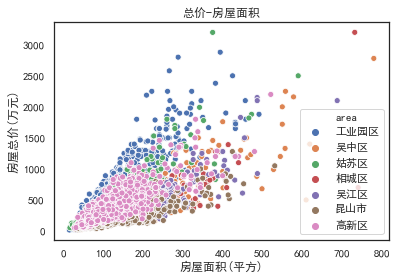

In [5]:
sns.scatterplot(data=df, x="hourseSize", y="total_price", hue="area")
plt.xlabel("房屋面积(平方)")
plt.ylabel("房屋总价(万元)")
plt.title("总价-房屋面积")
plt.savefig("pic/房价-面积.png", dpi=1500)

# 各区的均价

In [6]:
df2 = df.groupby("area", as_index=False).agg({"unit_price": "mean"})
df2.unit_price = df2.unit_price.apply(lambda x: round(x, 1))
df2
df2.mean()

,area,unit_price
0,吴中区,24935.4
1,吴江区,22045.4
2,姑苏区,28450.6
3,工业园区,41478.4
4,昆山市,17078.4
5,相城区,22972.5
6,高新区,29087.0


unit_price    26578.242857
dtype: float64

<BarContainer object of 7 artists>

Text(0, 24940.4, '24935.4')

Text(1, 22050.4, '22045.4')

Text(2, 28455.6, '28450.6')

Text(3, 41483.4, '41478.4')

Text(4, 17083.4, '17078.4')

Text(5, 22977.5, '22972.5')

Text(6, 29092.0, '29087.0')

Text(5, 36000, '全市均价26578.24元')

Text(0.5, 0, '市辖区')

Text(0, 0.5, '房价(元/每平方)')

Text(0.5, 1.0, '各市辖区均价')

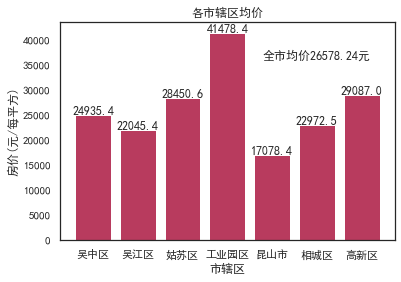

In [49]:
plt.bar(df2.area, df2.unit_price, color="#b83b5e")
for index, row in df2.iterrows():
    plt.text(
        index,
        row.unit_price + 5,
        round(row.unit_price, 1),
        ha="center",
    )
plt.text(
    5,
    36000,
    "全市均价26578.24元",
    ha="center",
)
plt.xlabel("市辖区")
plt.ylabel("房价(元/每平方)")
plt.title("各市辖区均价")
plt.savefig("pic/各区均价.png", dpi=1500)

# 小区均价前15

In [8]:
df3 = (
    df.groupby("community", as_index=False)
    .agg("mean")
    .sort_values("unit_price", ascending=False)
    .head(10)
)
df3

,community,total_price,unit_price,hourseSize
1800,澜韵园,2800.000000,97135.0,288.260000
1856,玲珑湾花园九、十区,1857.500000,88629.5,207.500000
1706,润园(姑苏区),3199.000000,85307.0,375.000000
...,...,...,...,...
2602,雅戈尔风尚,1022.000000,72469.5,140.021667
340,仁恒双湖湾,834.285714,72428.0,114.775714
236,中海湖滨一号,1059.882353,71929.0,146.857059


<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x24a747504c0>,
 [Text(0, 0, '澜韵园'),
  Text(0, 0, '玲珑湾花园九、十区'),
  Text(0, 0, '润园(姑苏区)'),
  Text(0, 0, '九龙仓国宾一号'),
  Text(0, 0, '玲珑湾花园七八区'),
  Text(0, 0, '师惠花苑'),
  Text(0, 0, '玲珑湾花园四区'),
  Text(0, 0, '雅戈尔风尚'),
  Text(0, 0, '仁恒双湖湾'),
  Text(0, 0, '中海湖滨一号')])

Text(0, 0.5, '房价(元/每平方)')

Text(0.5, 1.0, '小区均价前10')

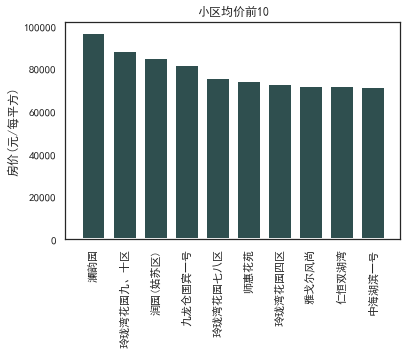

In [9]:
plt.bar(
    df3.community,
    df3.unit_price,
    #     alpha=0.5,
    width=0.8,
    color="#2F4F4F",
    #     edgecolor="purple",
    label="The First Bar",
    lw=3,
)
plt.xticks(np.arange(10), df3.community, rotation=90)
plt.ylabel("房价(元/每平方)")
plt.title("小区均价前10")
plt.savefig("pic/小区均价前10.png", dpi=1500, bbox_inches="tight")

# 小区在售前10

In [10]:
df4 = (
    df.groupby("community", as_index=False)
    .agg("count")
    .sort_values("unit_price", ascending=False)
    .head(10)[["community", "area"]]
)
df4

,community,area
22,万科北宸之光,140
1848,环秀湖花园,102
41,万科魅力花园,98
...,...,...
2161,苏州湾景苑,75
2657,首开玖珑花园,74
1867,理想家园,73


<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x24a74de87f0>,
 [Text(0, 0, '万科北宸之光'),
  Text(0, 0, '环秀湖花园'),
  Text(0, 0, '万科魅力花园'),
  Text(0, 0, '伟业迎春乐家'),
  Text(0, 0, '新城红树湾'),
  Text(0, 0, '海亮长桥府'),
  Text(0, 0, '绿地都会雅苑'),
  Text(0, 0, '苏州湾景苑'),
  Text(0, 0, '首开玖珑花园'),
  Text(0, 0, '理想家园')])

Text(0, 0.5, '在售房源数')

Text(0.5, 1.0, '小区在售房源数前10')

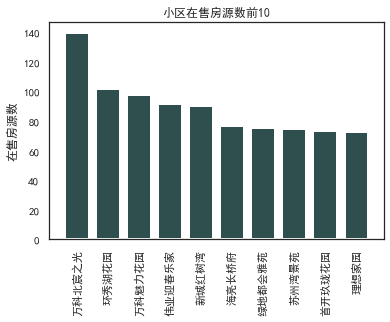

In [11]:
plt.bar(
    df4.community,
    df4.area,
    #     alpha=0.5,
    width=0.8,
    color="#2F4F4F",
    #     edgecolor="purple",
    label="The First Bar",
    lw=3,
)
plt.xticks(np.arange(10), df4.community, rotation=90)
plt.ylabel("在售房源数")
plt.title("小区在售房源数前10")
plt.savefig("pic/小区在售房源数前10.png", dpi=1500, bbox_inches="tight")

# 特别分析

In [12]:
df5 = df[df.community == "万科北宸之光"]

In [13]:
df.columns

Index(['area', 'title', 'community', 'position', 'tax', 'total_price',
       'unit_price', 'hourseType', 'hourseSize', 'direction', 'fitment'],
      dtype='object')

In [14]:
df5.mean()

tax                     NaN
total_price      235.640000
unit_price     26493.628571
hourseSize        89.224929
dtype: float64

In [15]:
df5_1 = df5.groupby("hourseType", as_index=False).count()
df5_1

,hourseType,area,title,community,position,tax,total_price,unit_price,hourseSize,direction,fitment
0,2室1厅,6,6,6,6,0,6,6,6,6,6
1,2室2厅,2,2,2,2,0,2,2,2,2,2
2,3室1厅,12,12,12,12,0,12,12,12,12,12
3,3室2厅,81,81,81,81,0,81,81,81,81,81
4,4室1厅,6,6,6,6,0,6,6,6,6,6
5,4室2厅,33,33,33,33,0,33,33,33,33,33


([<matplotlib.patches.Wedge at 0x24a74b5b4f0>,
 [Text(-1.017834732055748, 0.41714800517442746, '2室1厅'),
  Text(-1.0759623625469688, 0.22870285171450236, '2室2厅'),
  Text(-1.093974083155735, -0.11498132623852175, '3室1厅'),
  Text(0.6980609723613325, -0.976069095333907, '3室2厅'),
  Text(0.5921855938531015, 0.9269931080827136, '4室1厅'),
  Text(-0.33208408437661896, 1.0486754316297024, '4室2厅')],
 [Text(-0.5551825811213169, 0.22753527554968767, '4%'),
  Text(-0.5868885613892556, 0.12474701002609218, '1%'),
  Text(-0.5967131362667645, -0.06271708703919368, '9%'),
  Text(0.40720223387744386, -0.569373638944779, '58%'),
  Text(0.3230103239198735, 0.5056326044087528, '4%'),
  Text(-0.1811367732963376, 0.5720047808889286, '24%')])

Text(0.5, 1.0, '万科北宸之光在售房型')

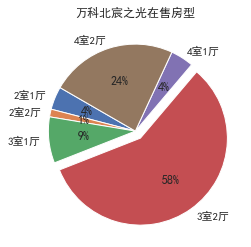

In [16]:
explode = (0, 0, 0, 0.1, 0, 0)
plt.pie(
    df5_1.area,
    explode=explode,
    labels=df5_1.hourseType,
    autopct="%1.f%%",
    shadow=False,
    startangle=150,
)
plt.title("万科北宸之光在售房型")
plt.savefig("pic/万科北宸之光在售房型.png", dpi=1500, bbox_inches="tight")

In [6]:
a = "".join(df5.title.tolist())

NameError: name 'df5' is not defined

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ts\AppData\Local\Temp\jieba.cache
Loading model cost 0.669 seconds.
Prefix dict has been built successfully.


(-0.5, 5999.5, 5591.5, -0.5)

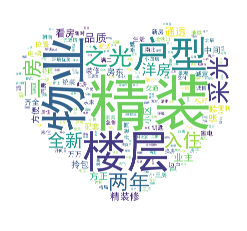

In [18]:
str1 = " ".join(jieba.cut(a))
wc = wordcloud.WordCloud(
    mask=np.array(Image.open(r"pic/云朵.jpg")),
    collocations=False,
    font_path="C:/Windows/Fonts/simhei.ttf",
    background_color="white",
    width=1000,
    height=800,
    mode="RGBA",
    scale=12,
    stopwords=["出售", "诚心", "北宸", "万科"],
).generate(str1)
wc.to_file(f"pic/万科之光.png")

plt.imshow(wc)
plt.axis("off")
plt.show()

Text(0.5, 1.0, '万科北宸之光在售房型大小分布')

Text(0.5, 0, '房屋大小范围')

Text(0, 0.5, '套数')

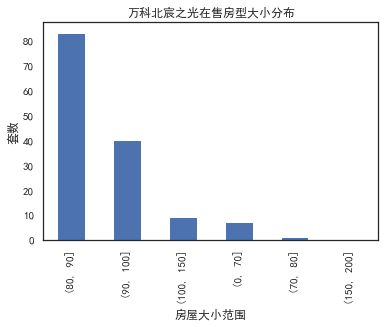

In [19]:
pd.cut(df5.hourseSize, bins=[0, 70, 80, 90, 100, 150, 200]).value_counts().plot(
    kind="bar"
)
plt.title("万科北宸之光在售房型大小分布")
plt.xlabel("房屋大小范围")
plt.ylabel("套数")
plt.savefig("pic/万科北宸之光在售房型大小分布.png", dpi=1500, bbox_inches="tight")

# 地段

In [30]:
df6 = (
    df.groupby("position", as_index=False)[["unit_price"]]
    .mean()
    .sort_values("unit_price", ascending=False)
    .head(10)
)

([<matplotlib.axis.XTick at 0x24a051769d0>,
 [Text(0, 0, '玲珑'),
  Text(0, 0, '湖西CBD'),
  Text(0, 0, '双湖'),
  Text(0, 0, '白塘'),
  Text(0, 0, '湖东CBD'),
  Text(0, 0, '东沙湖'),
  Text(0, 0, '湖东'),
  Text(0, 0, '十全街'),
  Text(0, 0, '独墅湖高教区'),
  Text(0, 0, '狮山')])

Text(0.5, 0, '地区')

Text(0, 0.5, '均价(元/每平)')

Text(0.5, 1.0, '均价最高的地区')

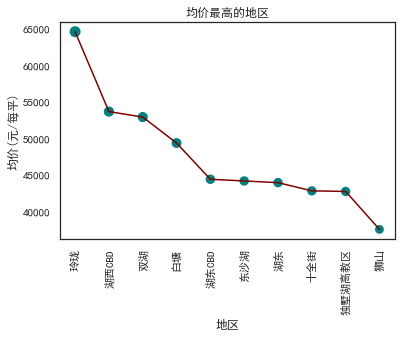

In [41]:
plt.scatter(
    df6.position,
    df6.unit_price,
    s=df6.unit_price / 800,
    #     c=df6.unit_price * 10,
    linewidths=2,
    color="#008080",
)
plt.plot(df6.position, df6.unit_price, color="#800000")
plt.xticks(np.arange(10), df6.position, rotation=90)
plt.xlabel("地区")
plt.ylabel("均价(元/每平)")
plt.title("均价最高的地区")
plt.savefig("pic/各地区均价.png", dpi=1500, bbox_inches="tight") 

## 雷达图

In [34]:
# ------- PART 1: Create background

# number of variable
categories = df6.position.tolist() 
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

([<matplotlib.projections.polar.ThetaTick at 0x24a050bab80>,
 [Text(0, 0, '玲珑'),
  Text(0, 0, '湖西CBD'),
  Text(0, 0, '双湖'),
  Text(0, 0, '白塘'),
  Text(0, 0, '湖东CBD'),
  Text(0, 0, '东沙湖'),
  Text(0, 0, '湖东'),
  Text(0, 0, '十全街'),
  Text(0, 0, '独墅湖高教区'),
  Text(0, 0, '狮山')])

([<matplotlib.projections.polar.RadialTick at 0x24a04f52d60>,
 [Text(0, 0, '25000'),
  Text(0, 0, '35000'),
  Text(0, 0, '45000'),
  Text(0, 0, '55000'),
  Text(0, 0, '70000')])

(25000.0, 70000.0)

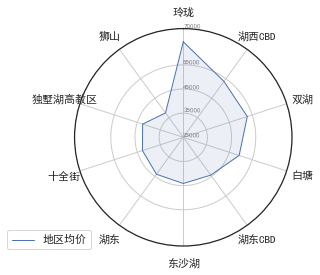

In [40]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25000, 35000, 45000,55000,70000], [str(i) for i in [25000, 35000, 45000,55000,70000]], color="grey", size=7)
plt.ylim(25000, 70000)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values = df6.unit_price.tolist()
values += values[:1] 
ax.plot(angles, values, linewidth=1, linestyle="solid", label="地区均价") 
ax.fill(angles, values, "b", alpha=0.1)

# # Ind2
# values = df.loc[1].drop("group").values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle="solid", label="group B")
# ax.fill(angles, values, "r", alpha=0.1)

# Add legend
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.savefig("pic/各地区均价2.png", dpi=1500, bbox_inches="tight") 

# 总体词云图

In [13]:
e=''.join([str(i) for i in df.title.tolist()])

(-0.5, 11999.5, 8003.5, -0.5)

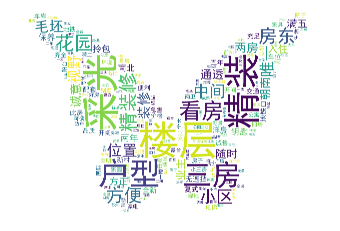

In [21]:
str1 = " ".join(jieba.cut(e))
wc = wordcloud.WordCloud(
    mask=np.array(Image.open(r"pic/蝴蝶.jpg")),
    collocations=False,
    font_path="C:/Windows/Fonts/simhei.ttf",
    background_color="white",
    width=1000,
    height=800,
    mode="RGBA",
    scale=12,
    stopwords=["出售", "诚心", "北宸", "万科"],
).generate(str1)
wc.to_file(f"pic/总词云.png")

plt.imshow(wc)
plt.axis("off")
plt.show() 